### Importing Libraries and setting env variables

In [1]:
import os
from groq import Groq
from dotenv import load_dotenv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

load_dotenv()

api_key = os.getenv("GROQ_API_KEY")
client = Groq(api_key=api_key)

### Prompting Model

In [3]:
def get_code_from_model(query):
    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a professional Python developer. "
                    "Answer all queries by generating only valid and clean Python code. "
                    "Always return complete code starting from loading and cleaning the dataset. "
                    "Do not provide any explanation or comments.\n\n"

                    "You have access to a dataset stored in 'household_power_consumption.csv'. "
                    "Start every answer by loading the dataset using:\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, "
                    "infer_datetime_format=True, na_values=['?'], low_memory=False)\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n\n"

                    "The columns in the DataFrame `df` are: 'Global_active_power', 'Global_reactive_power', 'Voltage', "
                    "'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'.\n"
                    "The index is 'datetime' and all columns contain floating point values.\n\n"

                    "Here are some examples:\n\n"

                    "Input: What is the peak voltage recorded each week in 2007?\n"
                    "Output:\n"
                    "import pandas as pd\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, "
                    "infer_datetime_format=True, na_values=['?'], low_memory=False)\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n"
                    "df.loc['2007'].resample('W')['Voltage'].max()\n\n"

                    "Input: On how many days did the Voltage drop below 235 volts?\n"
                    "Output:\n"
                    "import pandas as pd\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, "
                    "infer_datetime_format=True, na_values=['?'], low_memory=False)\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n"
                    "(df['Voltage'].resample('D').apply(lambda x: (x < 235).any())).sum()\n\n"


                    "Input: Find the correlation between Sub_metering_1 and Global_intensity.\n"
                    "Output:\n"
                    "import pandas as pd\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, "
                    "infer_datetime_format=True, na_values=['?'], low_memory=False)\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n"
                    "df[['Sub_metering_1', 'Global_intensity']].corr().loc['Sub_metering_1', 'Global_intensity']"

                    "Input: Find dates where total sub-metering energy exceeded 3 kWh.\n"
                    "Output:\n"
                    "import pandas as pd\n"
                    "df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, "
                    "infer_datetime_format=True, na_values=['?'], low_memory=False)\n"
                    "df = df.dropna()\n"
                    "df['Global_active_power'] = df['Global_active_power'].astype(float)\n"
                    "df = df.set_index('datetime')\n"
                    "df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']\n"
                    "daily_total = df['Total_Sub_metering'].resample('D').sum()\n"
                    "daily_total[daily_total > 3000].index.date\n\n"

                )
            },
            {
                "role": "user",
                "content": query
            }
        ],
        model="llama3-70b-8192",
        temperature=0,
        top_p=1,
    )

    return chat_completion.choices[0].message.content


### 1. What was the average active power consumption in March 2007?

In [4]:
question = "What was the average active power consumption in March 2007?"

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc['2007-03']['Global_active_power'].mean()


#### Running the code

In [5]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc['2007-03']['Global_active_power'].mean()

1.3186270301754073

### 2. What hour of the day had the highest power usage on Christmas 2006?

In [6]:
question = "What hour of the day had the highest power usage on Christmas 2006?"

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df_xmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]
df_xmas_2006['Global_active_power'].resample('H').sum().idxmax()


#### Running the code

In [7]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df_xmas_2006 = df[(df.index.year == 2006) & (df.index.month == 12) & (df.index.day == 25)]
df_xmas_2006['Global_active_power'].resample('H').sum().idxmax()

Timestamp('2006-12-25 22:00:00')

### 3. Compare energy usage (Global_active_power) on weekdays vs weekends.

In [8]:
question = "Compare energy usage (Global_active_power) on weekdays vs weekends."

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
weekdays = df[df.index.dayofweek < 5]['Global_active_power']
weekends = df[df.index.dayofweek >= 5]['Global_active_power']
print(weekdays.mean(), weekends.mean())


#### Running the code

In [9]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
weekdays = df[df.index.dayofweek < 5]['Global_active_power']
weekends = df[df.index.dayofweek >= 5]['Global_active_power']
print(weekdays.mean(), weekends.mean())

1.0354720516747509 1.234232176791304


### 4. Find days where energy consumption exceeded 5 kWh.

In [10]:
question = "Find days where energy consumption exceeded 5 kWh."

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
daily_consumption = df['Global_active_power'].resample('D').sum()
daily_consumption[daily_consumption > 5000].index.date


#### Running the code

In [7]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
daily_consumption = df['Global_active_power'].resample('D').sum()
daily_consumption[daily_consumption > 5000].index.date

/tmp/ipykernel_243793/34268679.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_243793/34268679.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
/tmp/ipykernel_243793/34268679.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=Tr

array([], dtype=object)

### 5. Plot the energy usage trend for the first week of January 2007.

In [13]:
question = "Plot the energy usage trend for the first week of January 2007.."

response = get_code_from_model(question)

print(response)

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df['Global_active_power'].loc['2007-01-01':'2007-01-07'].plot(kind='line')
plt.show()


#### Running the code

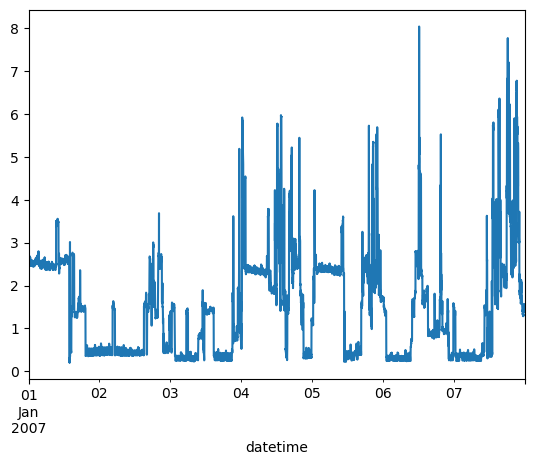

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df['Global_active_power'].loc['2007-01-01':'2007-01-07'].plot(kind='line')
plt.show()

### 6. Find the average voltage for each day of the first week of February 2007.

In [15]:
question = "Find the average voltage for each day of the first week of February 2007"

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc['2007-02-01':'2007-02-07'].resample('D')['Voltage'].mean()


#### Running the code

In [16]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df.loc['2007-02-01':'2007-02-07'].resample('D')['Voltage'].mean()

datetime
2007-02-01    240.392139
2007-02-02    240.334389
2007-02-03    238.910194
2007-02-04    239.633333
2007-02-05    240.810312
2007-02-06    241.264160
2007-02-07    241.149694
Freq: D, Name: Voltage, dtype: float64

### 7. What is the correlation between global active power and sub-metering values?

In [17]:
question = "What is the correlation between global active power and sub-metering values?"

response = get_code_from_model(question)

print(response)

import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power']


#### Running the code

In [18]:
import pandas as pd
df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')
df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr().loc['Global_active_power']

Global_active_power    1.000000
Sub_metering_1         0.484401
Sub_metering_2         0.434569
Sub_metering_3         0.638555
Name: Global_active_power, dtype: float64

### 7.1 What is the correlation between global active power and sub-metering values? Give me a plot also

In [19]:
question = "What is the correlation between global active power and sub-metering values? Give me a plot also"

response = get_code_from_model(question)

print(response)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation between Global Active Power and Sub-metering Values")
plt.colorbar()
plt.show()


#### Running the code

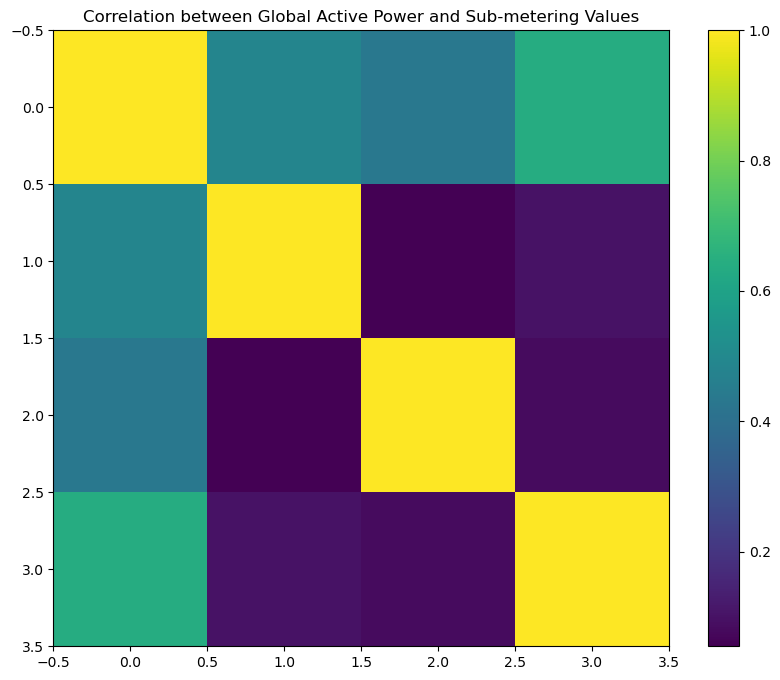

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('household_power_consumption.csv', sep=';', parse_dates={'datetime': ['Date', 'Time']}, infer_datetime_format=True, na_values=['?'], low_memory=False)
df = df.dropna()
df['Global_active_power'] = df['Global_active_power'].astype(float)
df = df.set_index('datetime')

corr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].corr()

plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation between Global Active Power and Sub-metering Values")
plt.colorbar()
plt.show()